In [1]:
#importing all the necessary libraries

from pylab import *
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np

In [10]:
#defining the parameters and setting default values
Nx = 25
Ny = 25
radius = 8
Niter = 1500

#getting input of parameters from the user
Nx = input("Enter size along x")
Ny = input("Enter size along y")
radius = input("Enter the radius")
Niter = input("Enter the number of iterations to perform")

#converting all the values to int
Nx = int(Nx)
Ny = int(Ny)
radius = int(radius)
Niter = int(Niter)

Enter size along x25
Enter size along y25
Enter the radius8
Enter the number of iterations to perform1500


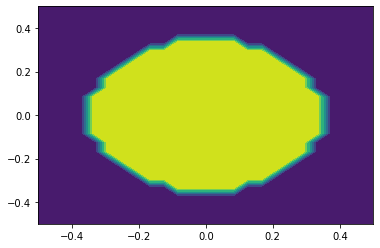

In [11]:
#declaring the potential matrix
phi = np.zeros((Ny, Nx))

#declaring lists containing x and y coordinates
y = np.linspace(-0.5, 0.5, Nx)
x = np.linspace(-0.5, 0.5, Ny)

#x and y coordinates for the entire space
Y,X = meshgrid(y,x)

#locating the region where potential should be 1.0
ii = np.where(X*X + Y*Y <= 0.35 * 0.35)

#assigning potentsial to be 1.0 in those regions
phi[ii] = 1.0

#contour plot of potential
contourf(Y, X, phi)
show()

In [12]:
#matrix for storing the old value of phi
oldphi = phi.copy()

#array for storing the error
errors = [None]*Niter

#performing iterations to update the potential
for k in range(Niter):
    #storing the old value of phi
    oldphi = phi.copy()
    
    #updating the potential
    phi[1:-1, 1:-1] = 0.25 * (phi[1:-1, 0:-2] + phi[1:-1, 2:] + phi[0:-2, 1:-1] + phi[2: , 1:-1])
    
    #Boundary conditions
    phi[1:-1, 0] = phi[1:-1, 1] #left boundary: normal derivative of phi = 0
    phi[1:-1, Nx-1] = phi[1:-1, Nx-2] #for the right boundary
    phi[Ny-1, 1:-1] = phi[Ny-2, 1:-1]  #for the top boundary
    phi[0, 1:-1] = 0 #for the bottom boundary, potential = 0
    phi[ii] = 1.0    #boundary values of the electrode
    
    #error
    errors[k] = (abs(phi - oldphi)).max()

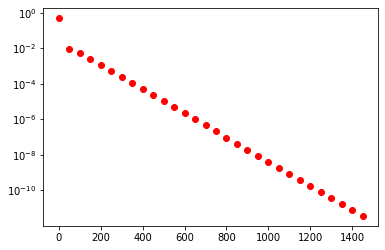

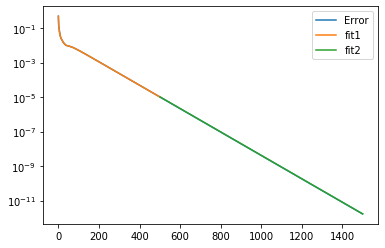

In [13]:
#semilogy plot of error, plotting every 50th point for visibility
semilogy(range(Niter)[::50], errors[::50], 'ro')
show()

semilogy(range(Niter), errors, label = "Error")      #entire error plot
semilogy(range(500), errors[0:500], label = "fit1")  #first 500 iterations which gives a linear plot
semilogy(range(501,1501), errors[500:1500], label = "fit2")  #after 500 itrations whih=ch goes to the exponential regime
legend()    #plotting with legends
show()

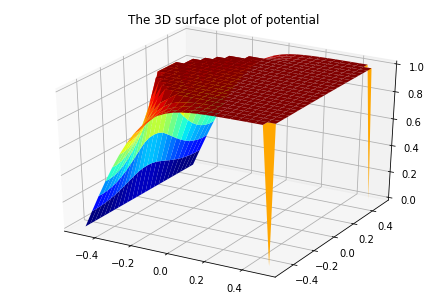

In [21]:
#3D plot of potential

fig1 = figure(4)   #opening a new figure
ax = p3.Axes3D(fig1)  #3D axes
title('The 3D surface plot of potential')  #title
surf = ax.plot_surface(Y, X, phi.T, rstride = 1, cstride = 1, cmap = cm.jet, linewidth = 0)   #plotting the potential 

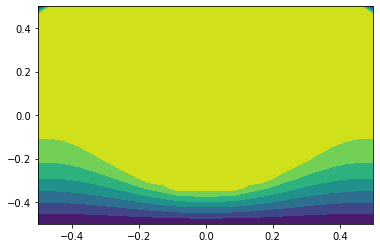

In [15]:
#contour plot of potential
contourf(Y, X, phi)
show()

In [16]:
#declaring the matrices for current
Jx = np.zeros((Nx, Ny))
Jy = np.zeros((Nx, Ny))

#assigning values to current
Jx[1:-1, 1:-1] = 0.5 * (phi[1:-1, 0:-2] - phi[1:-1, 2:])
Jy[1:-1, 1:-1] = 0.5 * (phi[0:-2, 1:-1] - phi[2: , 1:-1])

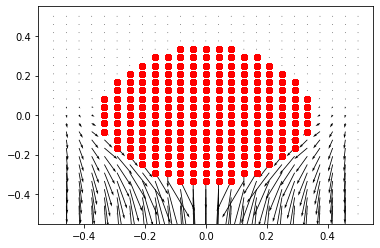

In [17]:
#quiver plot for current
quiver(x, y, -Jx, Jy)

#scatter plot in order to denote the electrode
scatter([X[i] for i in ii[0]], [X[i] for i in ii[1]], color = 'r')